In [1]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [5]:
provider = qiskit.IBMQ.load_account()

/home/user/.local/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


### 8192 shots linear 3 qubits

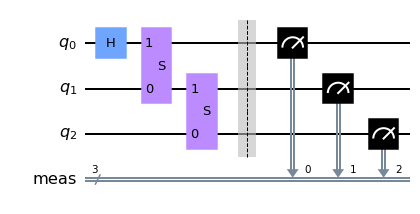

In [42]:
linear_interactions = {(i, i + 1): 1 for i in range(2)}
linear_circ = utils.linear_circuit(3, linear_interactions)
linear_circ.measure_all()
linear_circ.draw('mpl')

In [45]:
utils.run_and_write_to_csv(linear_circ, 'ibmq_lima', provider)

Job Status: job has successfully run


In [46]:
utils.run_and_write_to_csv(linear_circ, 'ibmq_santiago', provider)

Job Status: job has successfully run


In [47]:
lima_result = utils.result_from_csv('measured_data/ibmq_lima_8192_606a46f86421294e8d32c6b8.csv')
santiago_result = utils.result_from_csv('measured_data/ibmq_santiago_8192_606a4835d346d151986bb1e2.csv')

In [48]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(linear_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [49]:
true_pd = utils.get_probs_distribution(3, linear_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

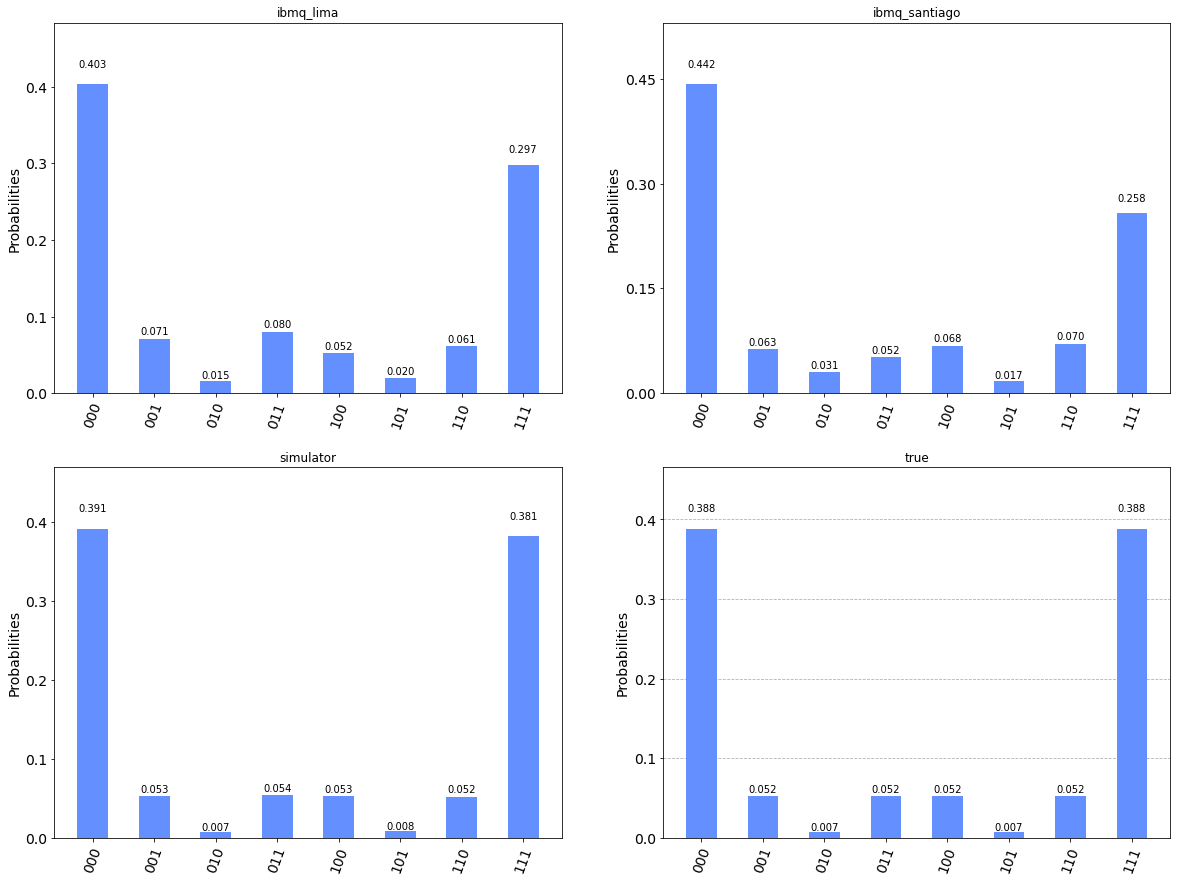

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

### 8192 shots linear 5 qubits

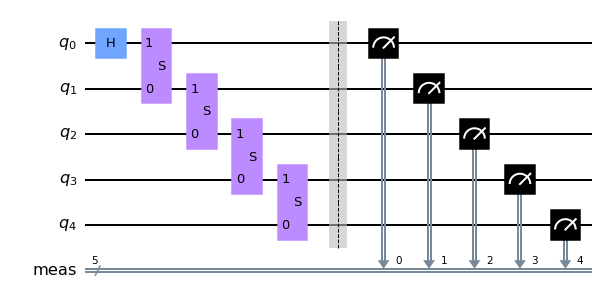

In [2]:
linear_interactions = {(i, i + 1): 1 for i in range(4)}
linear_circ = utils.linear_circuit(5, linear_interactions)
linear_circ.measure_all()
linear_circ.draw('mpl')

In [9]:
lima_result = utils.result_from_csv('measured_data/linear5_lima2.csv')
santiago_result = utils.result_from_csv('measured_data/linear5_santiago2.csv')
lima_result_bad_measures = utils.result_from_csv('measured_data/linear5_lima.csv')
santiago_result_bad_measures = utils.result_from_csv('measured_data/linear5_santiago.csv')

In [6]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(linear_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [7]:
true_pd = utils.get_probs_distribution(5, linear_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

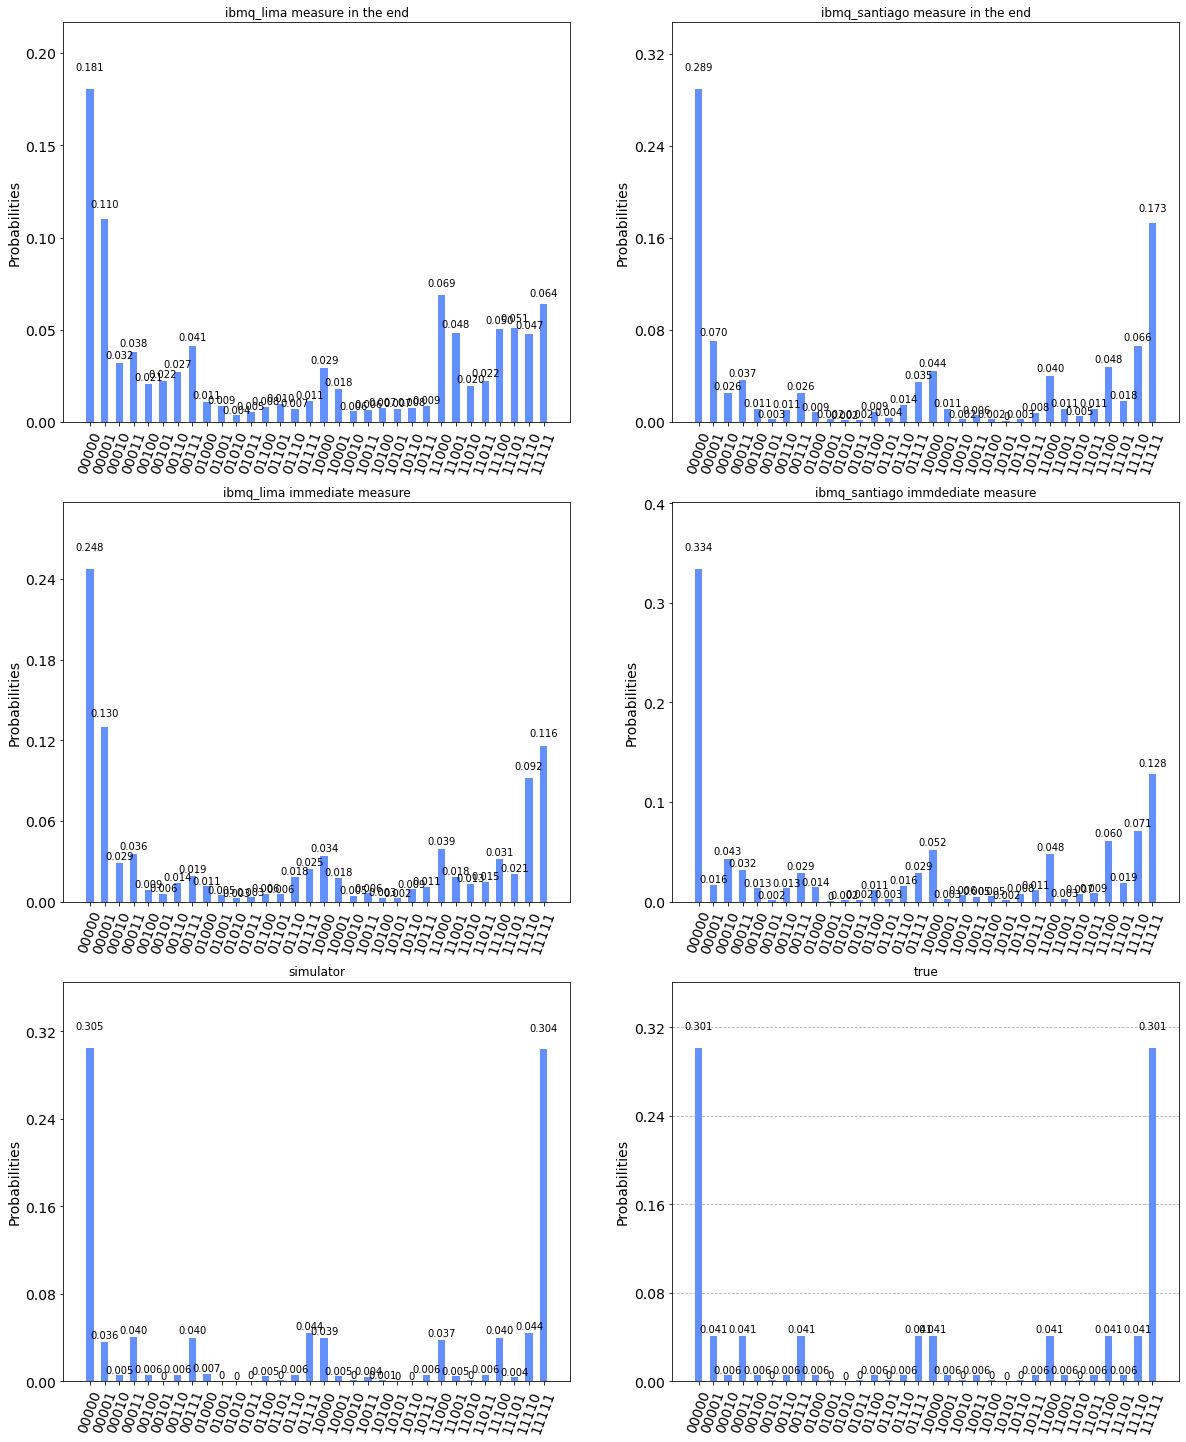

In [13]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax1.set_title('ibmq_lima measure in the end')
ax2.set_title('ibmq_santiago measure in the end')
ax3.set_title('ibmq_lima immediate measure')
ax4.set_title('ibmq_santiago immdediate measure')
ax5.set_title('simulator')
ax6.set_title('true')
fig.set_size_inches(20, 25)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(lima_result_bad_measures, ax=ax3)
qiskit.visualization.plot_histogram(santiago_result_bad_measures, ax=ax4)
qiskit.visualization.plot_histogram(sim_result, ax=ax5)
qiskit.visualization.plot_histogram(true_result, ax=ax6)

### 8192 shots 4 qubits circled

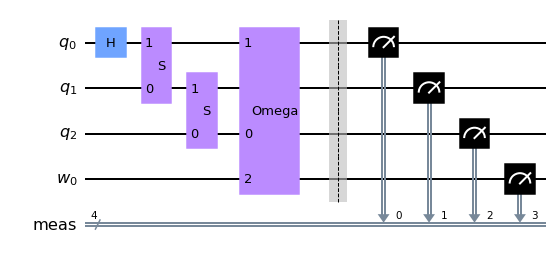

In [14]:
spins_n = 3
circled_interactions = {(i, (i + 1) % spins_n): 1 for i in range(spins_n)}
circled_circ = utils.circled_circuit(spins_n, circled_interactions)
circled_circ.measure_all()
circled_circ.draw('mpl')

In [15]:
lima_result = utils.result_from_csv('measured_data/circled3_lima.csv')
lima_result = utils.process_circled_result(lima_result)
santiago_result = utils.result_from_csv('measured_data/circled3_santiago.csv')
santiago_result = utils.process_circled_result(santiago_result) 

In [16]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(circled_circ, backend_sim, shots=8192)
sim_result = job_sim.result().get_counts()

In [17]:
sim_result = utils.process_circled_result(sim_result)

In [19]:
true_pd = utils.get_probs_distribution(3, circled_interactions)
true_result = {row['s']: row['Pr[s]'] for (ind, row) in true_pd.iterrows()}

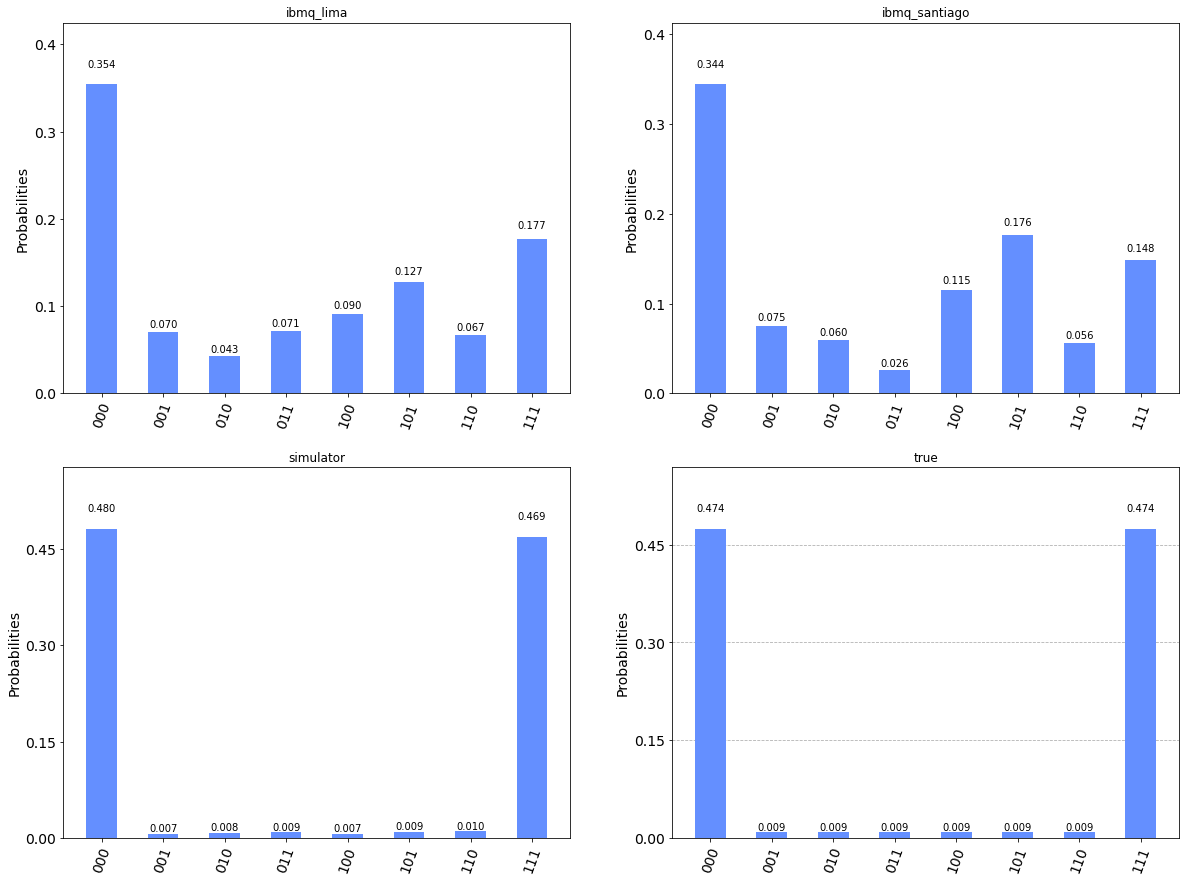

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_santiago')
ax3.set_title('simulator')
ax4.set_title('true')
fig.set_size_inches(20, 15)

qiskit.visualization.plot_histogram(lima_result, ax=ax1)
qiskit.visualization.plot_histogram(santiago_result, ax=ax2)
qiskit.visualization.plot_histogram(sim_result, ax=ax3)
qiskit.visualization.plot_histogram(true_result, ax=ax4)

## D-Wave adiabatic computer

In [21]:
import dimod
from dwave.system import DWaveSampler
from dwave.system import EmbeddingComposite

In [33]:
n = 20
bqm = dimod.BinaryQuadraticModel({i: 0 for i in range(n)},
                                 {(i, i + 1): -1 for i in range(n - 1)},
                                  0,
                                  dimod.Vartype.SPIN)

In [34]:
sampler = DWaveSampler() 
embedding_sampler = EmbeddingComposite(sampler)
sampleset = embedding_sampler.sample(bqm, num_reads=8192)

In [35]:
d_wave_linear_result = {}
for (obs, _, oc, _) in sampleset.record:
    d_wave_linear_result[utils.string01_from_spins(obs)] = oc

100%|██████████| 62/62 [00:00<00:00, 25559.94it/s]


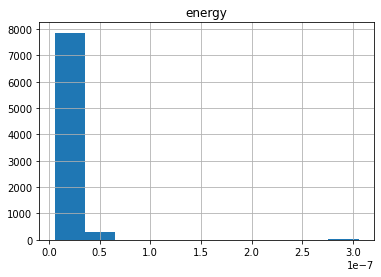

In [36]:
utils.draw_energy_hist(d_wave_linear_result, {(i, i + 1): -1 for i in range(n - 1)})

In [40]:
utils.spins_energy(utils.spins_from_string01(list(d_wave_linear_result.keys())[0]), {(i, i + 1): -1 for i in range(n - 1)})

5.602796437537268e-09

### 2048 linear

In [24]:
n = 2048
bqm = dimod.BinaryQuadraticModel({i: 0 for i in range(n)},
                                 {(i, i + 1): -1 for i in range(n - 1)},
                                  0,
                                  dimod.Vartype.SPIN)

In [25]:
sampler = DWaveSampler() 
embedding_sampler = EmbeddingComposite(sampler)
sampleset = embedding_sampler.sample(bqm, num_reads=8192)

In [26]:
d_wave_linear_result = {}
for (obs, _, oc, _) in sampleset.record:
    d_wave_linear_result[utils.string01_from_spins(obs)] = oc

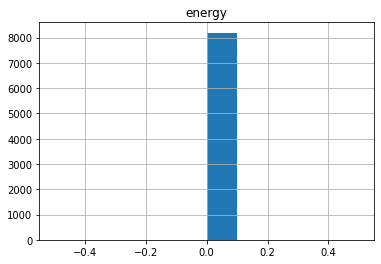

In [27]:
utils.draw_energy_hist(d_wave_linear_result, {(i, i + 1): -1 for i in range(n - 1)})

In [31]:
utils.spins_energy(utils.spins_from_string01(list(d_wave_linear_result.keys())[0]), {(i, i + 1): -1 for i in range(n - 1)})

0.0

In [32]:
list(d_wave_linear_result.keys())[0]

'000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111111111111111111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000011111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000000000000000000000000000000000000000000011111111111111111111111000000000011111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000000000000011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111111111111111111111111111111111111